# IMPORTING LIBRARY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score
from imblearn.over_sampling import SMOTE
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import joblib

# IMPORTING DATASET

In [2]:
#I download this free dataset from Kaggle. I would like to predict whether the customer would Churn or not

In [3]:
data = pd.read_csv("/content/dqlab_telco_final[1].csv")
data.head()

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,No,Yes,1,No,No,Yes,Yes,29.85,29.85,No
1,202006,45315483266,Male,No,Yes,60,Yes,No,No,Yes,20.50,1198.80,No
2,202006,45236961615,Male,No,No,5,Yes,Yes,Yes,No,104.10,541.90,Yes
3,202006,45929827382,Female,No,Yes,72,Yes,Yes,Yes,Yes,115.50,8312.75,No
4,202006,45305082233,Female,No,Yes,56,Yes,Yes,Yes,No,81.25,4620.40,No


# DATA PREPARATION

In [4]:
data.shape

(6950, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6950 entries, 0 to 6949
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UpdatedAt         6950 non-null   int64  
 1   customerID        6950 non-null   int64  
 2   gender            6950 non-null   object 
 3   SeniorCitizen     6950 non-null   object 
 4   Partner           6950 non-null   object 
 5   tenure            6950 non-null   int64  
 6   PhoneService      6950 non-null   object 
 7   StreamingTV       6950 non-null   object 
 8   InternetService   6950 non-null   object 
 9   PaperlessBilling  6950 non-null   object 
 10  MonthlyCharges    6950 non-null   float64
 11  TotalCharges      6950 non-null   float64
 12  Churn             6950 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 706.0+ KB


In [6]:
data.describe(include="all")

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,6950.0,6.950000e+03,6950,6950,6950,6950.000000,6950,6950,6950,6950,6950.000000,6950.000000,6950
unique,NaN,NaN,2,2,2,NaN,2,2,2,2,NaN,NaN,2
top,NaN,NaN,Male,No,No,NaN,Yes,No,Yes,Yes,NaN,NaN,No
freq,NaN,NaN,3505,5822,3591,NaN,6281,4279,5445,4114,NaN,NaN,5114
mean,202006.0,4.549898e+10,NaN,NaN,NaN,32.423165,NaN,NaN,NaN,NaN,64.992201,2286.058750,NaN
std,0.0,2.854091e+08,NaN,NaN,NaN,24.581073,NaN,NaN,NaN,NaN,30.032040,2265.702553,NaN
min,202006.0,4.500026e+10,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,19.000000,NaN
25%,202006.0,4.525607e+10,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,36.462500,406.975000,NaN
50%,202006.0,4.549871e+10,NaN,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,70.450000,1400.850000,NaN
75%,202006.0,4.574384e+10,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,89.850000,3799.837500,NaN


# DATA CLEANING

In [7]:
data.isnull().sum()

UpdatedAt           0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
tenure              0
PhoneService        0
StreamingTV         0
InternetService     0
PaperlessBilling    0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
#There is no null and duplcated data in dataset

In [10]:
data.columns

Index(['UpdatedAt', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'tenure', 'PhoneService', 'StreamingTV', 'InternetService',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
data_new = data.drop(['UpdatedAt', 'customerID'],axis=1)

In [12]:
#I decided to drop unnecessary column that it's not the important features for prediction

# EDA

In [13]:
#I create the graph of Churn data distribution

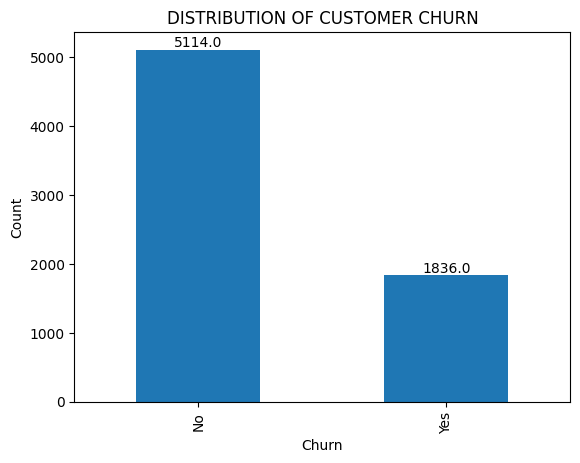

In [14]:
ax = data.Churn.value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0], fmt= '%0.1f', label_type='edge')
plt.title("DISTRIBUTION OF CUSTOMER CHURN")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

In [15]:
#from the graph we see that 1836 customers have Churned and 5114 is not Churn.

In [16]:
#Then I would do EDA for Numeric Variable

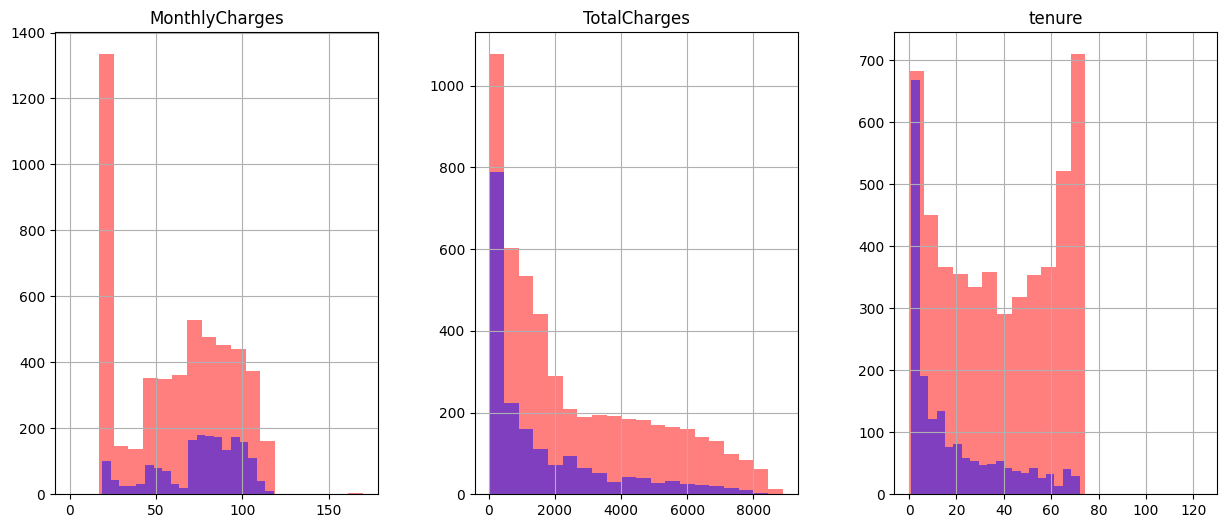

In [17]:
num_fea = ["MonthlyCharges","TotalCharges","tenure"]
fig, ax = plt.subplots(1, 3, figsize=(15,6))
data[data.Churn == 'No'][num_fea].hist(bins=20, color='red',alpha=0.5,ax=ax)
data[data.Churn == "Yes"][num_fea].hist(bins=20, color='blue',alpha=0.5, ax=ax)
plt.show()

In [18]:
#from the graph we see that customer who have higher monthly charges but lower Total Charges would tend to be Churn
#and customer with lower tenure would tend to be Churn

In [19]:
category_col = data_new.select_dtypes(include=['object']).columns

In [20]:
category_col

Index(['gender', 'SeniorCitizen', 'Partner', 'PhoneService', 'StreamingTV',
       'InternetService', 'PaperlessBilling', 'Churn'],
      dtype='object')

In [21]:
#I will do EDA of category variable

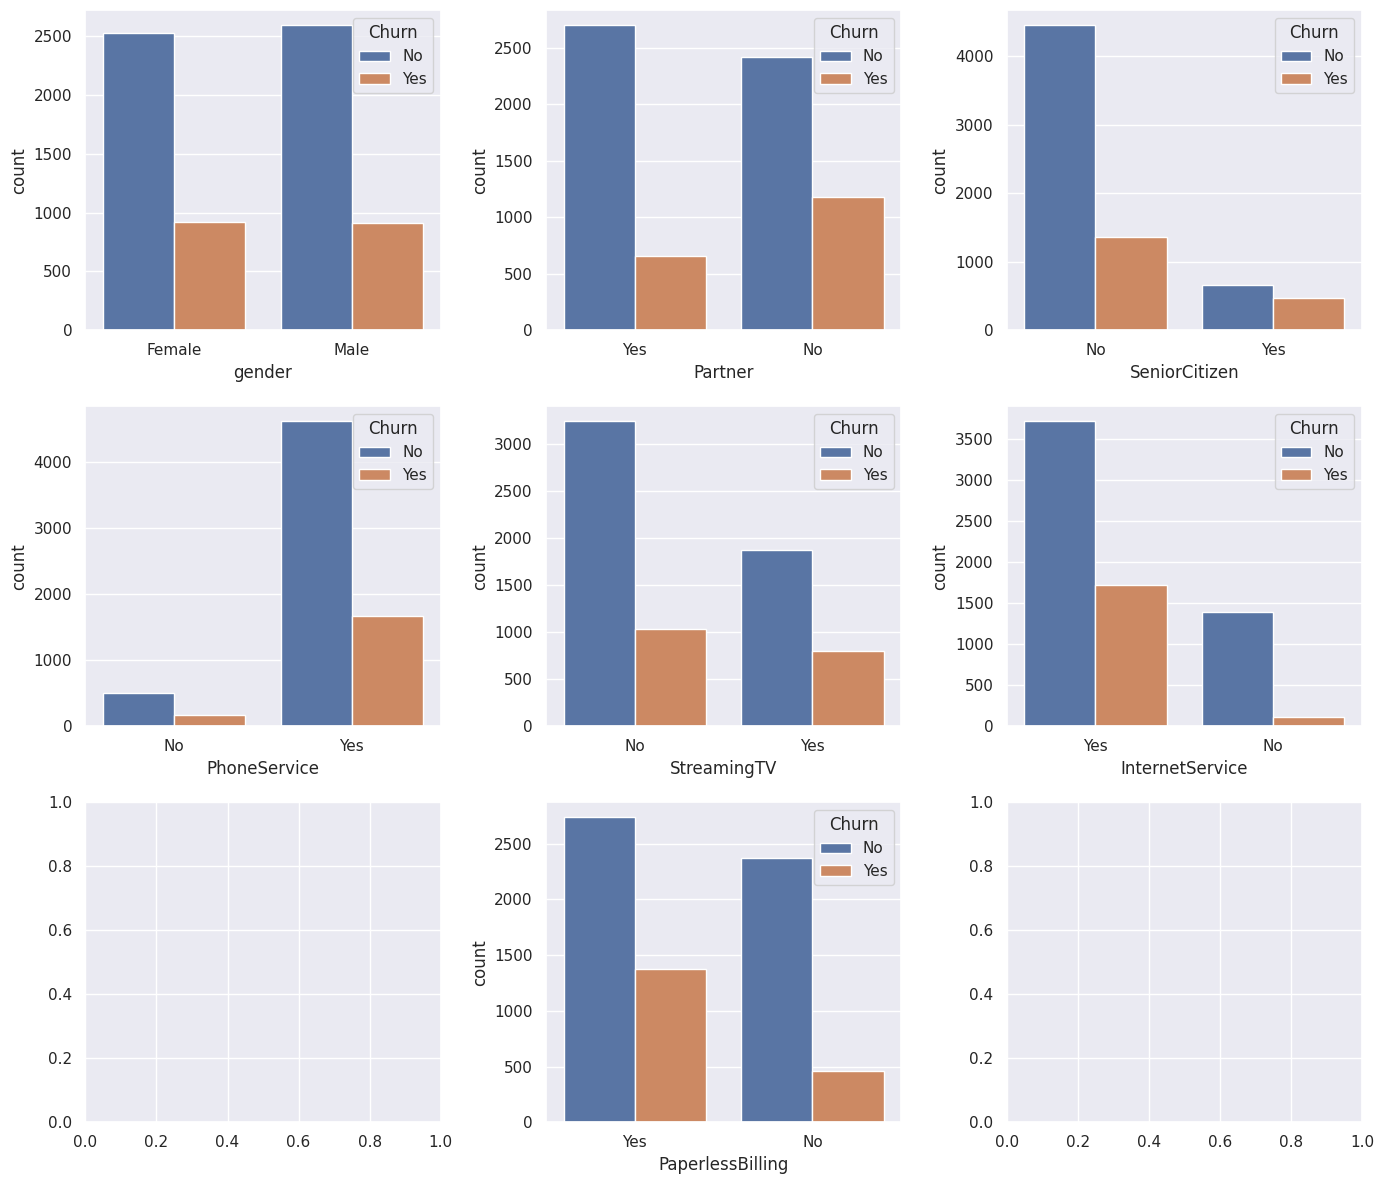

In [22]:
sns.set(style='darkgrid')


fig, ax = plt.subplots(3, 3, figsize=(14, 12))
sns.countplot(data=data, x='gender', hue='Churn', ax=ax[0][0])
sns.countplot(data=data, x='Partner', hue='Churn', ax=ax[0][1])
sns.countplot(data=data, x='SeniorCitizen', hue='Churn', ax=ax[0][2])
sns.countplot(data=data, x='PhoneService', hue='Churn', ax=ax[1][0])
sns.countplot(data=data, x='StreamingTV', hue='Churn', ax=ax[1][1])
sns.countplot(data=data, x='InternetService', hue='Churn', ax=ax[1][2])
sns.countplot(data=data, x='PaperlessBilling', hue='Churn', ax=ax[2][1])
plt.tight_layout()
plt.show()

In [23]:
#Gender variable has no effect on the Churn rate(picture 1)
#Customer who have no partner higher tend to be Churn than the customer who have partner(picture 2)
#Customer who are not the senior citizen would higher tend to be Churn(picture 3)
#Customer who have connection of phone service would higher tend to be Churn(picture 4)
#Customer who have not streaming tv connection would higher tend to be Churn(picture 5)
#Customer who have internet service connection would higher tend to be Churn(picture 6)
#Customer who have Paperless Billing would higher tend to be Churn(picture 7)

# MACHINE LEARNING

In [24]:
#encoding category columns

In [25]:
#I will change the category columns into numeric format because of Machine learning only could read the numeric format

In [26]:
en=LabelEncoder()
for i in category_col:
  data_new[i]=en.fit_transform(data[i])

In [27]:
data_new.head()

,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,0,0,1,1,0,0,1,1,29.85,29.85,0
1,1,0,1,60,1,0,0,1,20.50,1198.80,0
2,1,0,0,5,1,1,1,0,104.10,541.90,1
3,0,0,1,72,1,1,1,1,115.50,8312.75,0
4,0,0,1,56,1,1,1,0,81.25,4620.40,0


In [28]:
le = preprocessing.LabelEncoder()
le.fit(data['gender'])
le_gender_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

le.fit(data['SeniorCitizen'])
le_seniorcitizen_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

le.fit(data['Partner'])
le_partner_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

le.fit(data['PhoneService'])
le_ps_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

le.fit(data['StreamingTV'])
le_STV_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

le.fit(data['InternetService'])
le_is_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

le.fit(data['PaperlessBilling'])
le_pb_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

le.fit(data['Churn'])
le_Ch_mapping = dict(zip(le.classes_, le.transform(le.classes_)))


print(le_gender_mapping)
print(le_seniorcitizen_mapping)
print(le_partner_mapping)
print(le_ps_mapping)
print(le_STV_mapping)
print(le_is_mapping)
print(le_pb_mapping)
print(le_Ch_mapping)


{'Female': 0, 'Male': 1}
{'No': 0, 'Yes': 1}
{'No': 0, 'Yes': 1}
{'No': 0, 'Yes': 1}
{'No': 0, 'Yes': 1}
{'No': 0, 'Yes': 1}
{'No': 0, 'Yes': 1}
{'No': 0, 'Yes': 1}


In [29]:
data_new['Churn'].value_counts()

0    5114
1    1836
Name: Churn, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

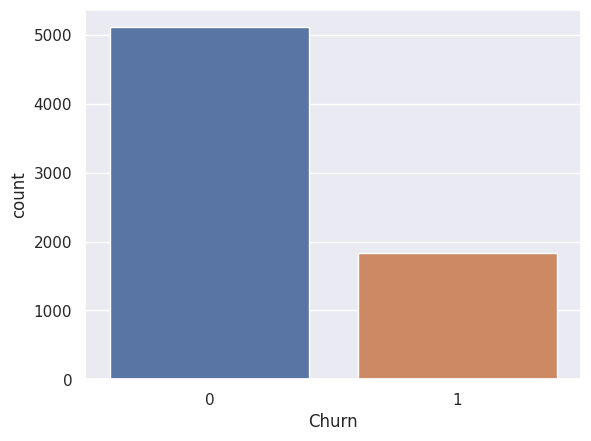

In [30]:
sns.countplot(x='Churn', data=data_new)

In [31]:
#from the graph we see that the data is imbalance. in the next stage I will make the data to be balance data

In [32]:
X = data_new.drop('Churn', axis=1)
y = data_new['Churn']

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [34]:
#feature scaling

In [35]:
sc = StandardScaler()

In [36]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [37]:
X_train

array([[ 0.99820305, -0.44063372, -0.96883084, ..., -1.18966006,
        -1.40256345, -0.89687574],
       [-1.00180018, -0.44063372, -0.96883084, ...,  0.84057626,
        -1.00255912, -0.80799688],
       [-1.00180018, -0.44063372,  1.03217193, ...,  0.84057626,
        -1.00088546, -0.54036488],
       ...,
       [ 0.99820305, -0.44063372, -0.96883084, ...,  0.84057626,
        -0.47200945, -0.73736716],
       [ 0.99820305, -0.44063372,  1.03217193, ..., -1.18966006,
        -1.48792002, -0.82177775],
       [-1.00180018, -0.44063372, -0.96883084, ...,  0.84057626,
        -1.52808782, -0.99677046]])

In [38]:
#I handle imbalance data with SMOTE

In [39]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [40]:
y_res.value_counts()

0    5114
1    5114
Name: Churn, dtype: int64

In [41]:
#I split the balance data into data train and data test

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.20,random_state=42)

In [43]:
sc = StandardScaler()

In [44]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [45]:
X_train

array([[ 1.15573018, -0.40132461, -0.78752652, ...,  0.82760248,
        -0.79858677, -0.91890485],
       [ 1.15573018, -0.40132461, -0.78752652, ..., -1.20830957,
        -0.12597017, -0.50522231],
       [-0.86525386, -0.40132461,  1.26979851, ..., -1.20830957,
        -1.70247706, -0.45048966],
       ...,
       [ 1.15573018, -0.40132461,  1.26979851, ..., -1.20830957,
        -1.67620195, -0.7501138 ],
       [-0.86525386, -0.40132461, -0.78752652, ...,  0.82760248,
        -1.71824213, -0.93090295],
       [-0.86525386, -0.40132461, -0.78752652, ...,  0.82760248,
        -1.01942357, -0.60478166]])

In [46]:
#I will try some models to find the best model to create machine learning

In [47]:
#Logistic regression

In [48]:
log = LogisticRegression()

In [49]:
log.fit(X_train,y_train)

LogisticRegression()

In [50]:
y_pred1 = log.predict(X_test)

In [51]:
accuracy_score(y_test,y_pred1)

0.7570869990224829

In [52]:
precision_score(y_test,y_pred1)

0.7518450184501845

In [53]:
recall_score(y_test,y_pred1)

0.7813998082454459

In [54]:
f1_score(y_test,y_pred1)

0.7663375646450399

In [55]:
#SVM

In [56]:
svm= svm.SVC()

In [57]:
svm.fit(X_train,y_train)

SVC()

In [58]:
y_pred2 = svm.predict(X_test)

In [59]:
accuracy_score(y_test,y_pred2)

0.7702834799608993

In [60]:
precision_score(y_test,y_pred2)

0.7640552995391705

In [61]:
recall_score(y_test,y_pred2)

0.7948226270373921

In [62]:
f1_score(y_test,y_pred2)

0.7791353383458647

In [63]:
#KNeighbors Classifier

In [64]:
knn = KNeighborsClassifier()

In [65]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [66]:
y_pred3 = knn.predict(X_test)

In [67]:
accuracy_score(y_test,y_pred3)

0.7663734115347018

In [68]:
precision_score(y_test,y_pred3)

0.7542754275427542

In [69]:
recall_score(y_test,y_pred3)

0.8034515819750719

In [70]:
f1_score(y_test,y_pred3)

0.7780872794800371

In [71]:
#Decision Tree Classifier

In [72]:
dt = DecisionTreeClassifier()

In [73]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [74]:
y_pred4 = dt.predict(X_test)

In [75]:
accuracy_score(y_test,y_pred4)

0.7595307917888563

In [76]:
precision_score(y_test,y_pred4)

0.7641418983700863

In [77]:
recall_score(y_test,y_pred4)

0.7641418983700863

In [78]:
f1_score(y_test,y_pred4)

0.7641418983700863

In [79]:
rf = RandomForestClassifier()

In [80]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [81]:
y_pred5 = rf.predict(X_test)

In [82]:
accuracy_score(y_test,y_pred5)

0.8010752688172043

In [83]:
precision_score(y_test,y_pred5)

0.8045977011494253

In [84]:
recall_score(y_test,y_pred5)

0.8053691275167785

In [85]:
f1_score(y_test,y_pred5)

0.8049832295160518

In [86]:
#Gradient Boosting Classifier

In [87]:
gbc = GradientBoostingClassifier()

In [88]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [89]:
y_pred6 = gbc.predict(X_test)

In [90]:
accuracy_score(y_test,y_pred6)

0.7795698924731183

In [91]:
precision_score(y_test,y_pred6)

0.7695810564663024

In [92]:
recall_score(y_test,y_pred4)

0.7641418983700863

In [93]:
f1_score(y_test,y_pred4)

0.7641418983700863

In [94]:
final_data =pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],
                          'ACC':[accuracy_score(y_test,y_pred1),
                                 accuracy_score(y_test,y_pred2),
                                 accuracy_score(y_test,y_pred3),
                                 accuracy_score(y_test,y_pred4),
                                 accuracy_score(y_test,y_pred5),
                                 accuracy_score(y_test,y_pred6)]})

In [95]:
final_data

,Models,ACC
0,LR,0.757087
1,SVC,0.770283
2,KNN,0.766373
3,DT,0.759531
4,RF,0.801075
5,GBC,0.779570


In [96]:
#SAve The model

In [97]:
X_res = sc.fit_transform(X_res)

In [98]:
rf.fit(X_res,y_res)

RandomForestClassifier()

In [99]:
joblib.dump(rf,'Churn_predict_model')

['Churn_predict_model']

In [100]:
model = joblib.load('Churn_predict_model')

In [101]:
data.columns

Index(['UpdatedAt', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'tenure', 'PhoneService', 'StreamingTV', 'InternetService',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [102]:
data.head()

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,No,Yes,1,No,No,Yes,Yes,29.85,29.85,No
1,202006,45315483266,Male,No,Yes,60,Yes,No,No,Yes,20.50,1198.80,No
2,202006,45236961615,Male,No,No,5,Yes,Yes,Yes,No,104.10,541.90,Yes
3,202006,45929827382,Female,No,Yes,72,Yes,Yes,Yes,Yes,115.50,8312.75,No
4,202006,45305082233,Female,No,Yes,56,Yes,Yes,Yes,No,81.25,4620.40,No


In [103]:
model.predict([[1,1,1,52,1,1,1,1,180,8900]])

array([1])

# CONCLUSION

In [ ]:
#from the graph we see that customer who have higher monthly charges but lower Total Charges would tend to be Churn
#and customer with lower tenure would tend to be Churn
#Gender variable has no effect on the Churn rate(picture 1)
#Customer who have no partner higher tend to be Churn than the customer who have partner(picture 2)
#Customer who are not the senior citizen would higher tend to be Churn(picture 3)
#Customer who have connection of phone service would higher tend to be Churn(picture 4)
#Customer who have not streaming tv connection would higher tend to be Churn(picture 5)
#Customer who have internet service connection would higher tend to be Churn(picture 6)
#Customer who have Paperless Billing would higher tend to be Churn(picture 7)